In [1]:
import pickle 
import glob
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.rcParams['font.family'] = "Noto Serif CJK JP"

columns = ['E', 'A', 'C', 'N', 'O']

# ファイル読み込み
with open('../../data/Hazumi_features/Hazumi1911_features.pkl', mode='rb') as f:
    TS_1911, SP_1911, _, _, _, _, _, vid_1911 = pickle.load(f, encoding='utf-8')

with open('../../data/Hazumi_features/Hazumi2010_features.pkl', mode='rb') as f:
    TS_2010, SP_2010, _, _, _, _, _, vid_2010 = pickle.load(f, encoding='utf-8')

with open('../../data/Hazumi_features/Hazumi2012_features.pkl', mode='rb') as f:
    TS_2012, SP_2012, _, _, _, _, _, vid_2012 = pickle.load(f, encoding='utf-8')

def show_boxplot(df):
    columns = ['E', 'A', 'C', 'N', 'O']
    df0 = df[df['cluster']==0].iloc[:,:-1]
    df1 = df[df['cluster']==1].iloc[:,:-1]
    df2 = df[df['cluster']==2].iloc[:,:-1]
    df3 = df[df['cluster']==3].iloc[:,:-1]

    fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(15, 5))
    
    ax0.set_xticklabels(columns)
    ax1.set_xticklabels(columns)
    ax2.set_xticklabels(columns)
    ax3.set_xticklabels(columns)

    ax0.set_title(f'class0 (データ数:{len(df0)})')
    ax1.set_title(f'class1 (データ数:{len(df1)})')
    ax2.set_title(f'class2 (データ数:{len(df2)})')
    ax3.set_title(f'class3 (データ数:{len(df3)})')

    ax0.boxplot(df0)
    ax1.boxplot(df1)
    ax2.boxplot(df2)
    ax3.boxplot(df3)

    ax0.axhline(0, linestyle='--', color='red')
    ax1.axhline(0, linestyle='--', color='red')
    ax2.axhline(0, linestyle='--', color='red')
    ax3.axhline(0, linestyle='--', color='red')

    plt.show()

# クラスタリング

## Hazumi1911

/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_22730/1141193352.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(columns)
/tmp/ipykernel_22730/1141193352.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(columns)
/tmp/ipykernel_22730/1141193352.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(columns)
/tmp/ipykernel_22730/1141193352.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(columns)


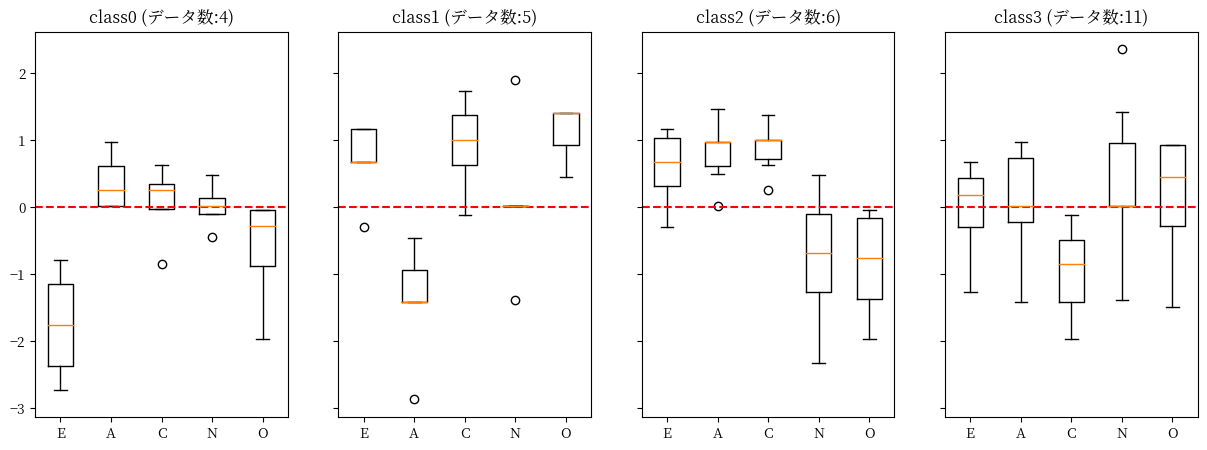

In [14]:
df_1911 = pd.DataFrame.from_dict(SP_1911, orient='index', columns=columns)
sc = StandardScaler()
df_1911 = sc.fit_transform(df_1911)
df_1911 = pd.DataFrame(df_1911, columns=columns)

model = KMeans(n_clusters=4, random_state=0) 
model.fit(df_1911)
cluster = model.labels_

df_1911['cluster'] = cluster
show_boxplot(df_1911)

## HazumiAll(1911, 2010, 2012)

/home/ryoyanagimoto/anaconda3/envs/personality/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_25366/314091597.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(columns)
/tmp/ipykernel_25366/314091597.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(columns)
/tmp/ipykernel_25366/314091597.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(columns)
/tmp/ipykernel_25366/314091597.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(columns)


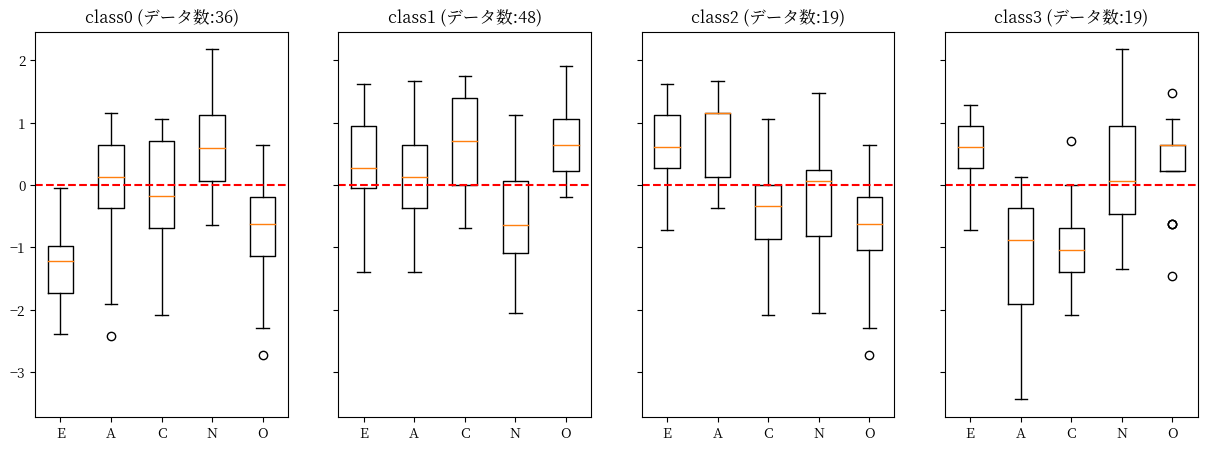

In [2]:
SP = {}
SP.update(SP_1911)
SP.update(SP_2010)
SP.update(SP_2012)

vid = []
vid.extend(vid_1911)
vid.extend(vid_2010)
vid.extend(vid_2012)

df = pd.DataFrame.from_dict(SP, orient='index', columns=columns)
sc = StandardScaler()
df = sc.fit_transform(df)
df = pd.DataFrame(df, columns=columns, index=vid)

model = KMeans(n_clusters=4, random_state=0) 
model.fit(df)
cluster = model.labels_

df['cluster'] = cluster
show_boxplot(df)

## クラスタごとの分析

### HazumiAll

In [31]:
import math 
TS = {} 
TS.update(TS_1911)
TS.update(TS_2010)
TS.update(TS_2012)

sentiments = [[], [], [], []]
ages = [[], [], [], []]

for id in vid:
    cluster = df.loc[id, "cluster"]
    sentiment = math.floor(sum(TS[id]) / len(TS[id])*100)/100
    sentiments[cluster].append(sentiment)
    ages[cluster].append(int(id[5:7]))

sentiments = [round(sum(sentiments[0]) / len(sentiments[0]), 1) for sentiment in sentiments]
ages = [round(sum(age) / len(age)) for age in ages]
print("sentiments:", sentiments)
print("age:", ages)

sentiments: [4.8, 4.8, 4.8, 4.8]
age: [33, 40, 36, 33]
